# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [65]:
import pandas as pd
import numpy as np
import requests
import tweepy
import time 
import json
import os
import re


In [66]:
df1_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

df1_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [67]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

In [68]:
df2_image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')
df2_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [69]:
#Note: this code is not working for twitter api V2 and some forbidden issues, so we'll continue from the file in the cell below.
'''

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df1_twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new lin

In [70]:
#getting the data from the 'tweet_jason' text file.
collums = ['id', 'favorite_count', 'retweet_count']

with open('tweet_json.txt', 'r') as file:
    data = [json.loads(line) for line in file]

data = [{'tweet_id': tweet['id'], 'favorite_count': tweet['favorite_count'], 'retweet_count': tweet['retweet_count']} for tweet in data]

df3_twitter_api = pd.DataFrame(data)
df3_twitter_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [71]:
df1_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [72]:
df2_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [73]:
df3_twitter_api

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [74]:
df1_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [75]:
df2_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
df3_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [77]:
df1_twitter_archive.name.value_counts()

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

### Quality issues
1. df1: extra data for the retweets, columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

2. df1: name column has the name 'a' repeated for 55 entries.

3. df1: name column has inconsistent capitalization.

4. df1: timestamp column type is object and should be timestamp.

5. df1: rating_denominator is larger than 10 for 19 tweets.

6. df1: expanded_urls column has 59 null values.

7. df1: some rating_denominator values are zero.

8. df2: p1, p2, p3 have inconsistent capitalization.

### Tidiness issues
1. df1: doggo, floofer, pupper, puppo better to be in one column..

2. df3 better be merged with df2 and df1 to be as one master table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [78]:
# Make copies of original pieces of data
df1 = df1_twitter_archive.copy()
df2 = df2_image_predictions.copy()
df3 = df3_twitter_api.copy()

### Quality
### Issue #1:

#### Define:

df1:extra data for the retweets, columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
we will drop the columns after taking only null row.

#### Code

In [79]:
df1 = df1[(df1['retweeted_status_id'].isna()) & (df1['in_reply_to_status_id'].isna())]
df1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace= True)

#### Test

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2:

#### Define
df1: name column has the name 'a' repeated for 55 entries.
take only rows unequal to 'a'.

#### Code

In [81]:
df1 = df1[df1['name'] != 'a']

#### Test

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2042 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2042 non-null   int64 
 1   timestamp           2042 non-null   object
 2   source              2042 non-null   object
 3   text                2042 non-null   object
 4   expanded_urls       2039 non-null   object
 5   rating_numerator    2042 non-null   int64 
 6   rating_denominator  2042 non-null   int64 
 7   name                1439 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              226 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 207.4+ KB


### Issue #3:

#### Define
df1: name column has inconsistance capitalization.
we will capitalize all rows.

#### Code

In [83]:
df1['name'] = df1['name'].str.upper()

#### Test

In [84]:
df1['name'].str.islower().sum()

0

### Issue #4:

#### Define
df1: timestamp column type is object and should be timestamp.

#### Code

In [85]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

#### Test

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2042 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2042 non-null   int64              
 1   timestamp           2042 non-null   datetime64[ns, UTC]
 2   source              2042 non-null   object             
 3   text                2042 non-null   object             
 4   expanded_urls       2039 non-null   object             
 5   rating_numerator    2042 non-null   int64              
 6   rating_denominator  2042 non-null   int64              
 7   name                1439 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              226 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), ob

### Issue #5:

#### Define
df1: some rating_denominator is larger than 10.
we will replace any value greater than 10 with 10.

#### Code

In [87]:
df1.loc[(df1.rating_denominator > 10), 'rating_denominator'] = 10


#### Test

In [88]:
df1[df1['rating_denominator'] > 10].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #6:

#### Define
df1: expanded_urls column has 59 null values.
we will drop na values from the dataframe.

#### Code

In [89]:
df1 = df1[df1['expanded_urls'].notna()]

#### Test

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2039 non-null   int64              
 1   timestamp           2039 non-null   datetime64[ns, UTC]
 2   source              2039 non-null   object             
 3   text                2039 non-null   object             
 4   expanded_urls       2039 non-null   object             
 5   rating_numerator    2039 non-null   int64              
 6   rating_denominator  2039 non-null   int64              
 7   name                1439 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              225 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), ob

### Issue #7:

#### Define
df1: some rating_denominator values are zero.
we will replace zero with 10.

#### Code

In [91]:
df1.loc[(df1.rating_denominator == 0), 'rating_denominator'] = 10

#### Test

In [92]:
df1[df1.rating_denominator == 0].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #8:

#### Define
df2: p1, p2, p3 have inconsistance capitalization.
we will capitalize all values in the three columns.

#### Code

In [93]:
df2['p1'] = df2['p1'].str.upper()
df2['p2'] = df2['p2'].str.upper()
df2['p3'] = df2['p3'].str.upper()

#### Test

In [94]:
print(df2['p1'].str.islower().sum())
print(df2['p2'].str.islower().sum())
print(df2['p3'].str.islower().sum())

0
0
0


### tidiness
### Issue #1:

#### Define
df1: doggo, floofer, pupper, puppo better to be in one column name 'stage'.
we will merge the four columns in one, then drop the original four.

#### Code

In [95]:
# Replace None values with empty ''

df1.loc[(df1.doggo.isna()), 'doggo'] = ''
df1.loc[(df1.floofer.isna()), 'floofer'] = ''
df1.loc[(df1.pupper.isna()), 'pupper'] = ''
df1.loc[(df1.puppo.isna()), 'puppo'] = ''


# merge all in 'dog_state'
df1['dog_stage'] = df1.doggo + df1.floofer + df1.pupper + df1.puppo

df1.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

df1.loc[df1.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df1.loc[df1.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df1.loc[df1.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [96]:
print(df1['dog_stage'].value_counts())
print(df1.info())

dog_stage
                  1708
pupper             216
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2039 non-null   int64              
 1   timestamp           2039 non-null   datetime64[ns, UTC]
 2   source              2039 non-null   object             
 3   text                2039 non-null   object             
 4   expanded_urls       2039 non-null   object             
 5   rating_numerator    2039 non-null   int64              
 6   rating_denominator  2039 non-null   int64              
 7   name                1439 non-null   object             
 8   dog_stage           2039 non-null   object             
dtypes: 

### Issue #2:

#### Define
df3 better be merged with df2 and df1 to be as one master table.

#### Code

In [97]:
master_df = pd.merge(pd.merge(df1, df2, on= ['tweet_id']), df3, on= ['tweet_id'])

#### Test

In [98]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1916 non-null   int64              
 1   timestamp           1916 non-null   datetime64[ns, UTC]
 2   source              1916 non-null   object             
 3   text                1916 non-null   object             
 4   expanded_urls       1916 non-null   object             
 5   rating_numerator    1916 non-null   int64              
 6   rating_denominator  1916 non-null   int64              
 7   name                1392 non-null   object             
 8   dog_stage           1916 non-null   object             
 9   jpg_url             1916 non-null   object             
 10  img_num             1916 non-null   int64              
 11  p1                  1916 non-null   object             
 12  p1_conf             1916 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
master_df.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [100]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1916 non-null   int64              
 1   timestamp           1916 non-null   datetime64[ns, UTC]
 2   source              1916 non-null   object             
 3   text                1916 non-null   object             
 4   expanded_urls       1916 non-null   object             
 5   rating_numerator    1916 non-null   int64              
 6   rating_denominator  1916 non-null   int64              
 7   name                1392 non-null   object             
 8   dog_stage           1916 non-null   object             
 9   jpg_url             1916 non-null   object             
 10  img_num             1916 non-null   int64              
 11  p1                  1916 non-null   object             
 12  p1_conf             1916 non-null 

# Insights:
1. Top 10 dogs favorite count

2. Top 10 dogs with highest rate

3. Top 10 breeds favorite count

In [101]:
top_fav_dogs = master_df.groupby('name')['favorite_count'].sum().sort_values(ascending=False).nlargest(10)
top_fav_dogs

name
BO         185922
CHARLIE    115468
ZOEY       113581
LUCY       110523
DUDDLES    107956
QUITE      107309
STEPHAN    107015
JAMESY     106827
PENNY      102986
STANLEY     99345
Name: favorite_count, dtype: int64

In [102]:
top_rate_dogs = master_df.groupby('name')['rating_numerator'].mean().sort_values(ascending=False).nlargest(10)
top_rate_dogs

name
ATTICUS     893.5
THIS        204.0
LOGAN        75.0
BLUEBERT     50.0
SAM          17.0
SOPHIE       15.0
DOOBERT      14.0
SUNDANCE     14.0
CLIFFORD     14.0
KUYU         14.0
Name: rating_numerator, dtype: float64

In [103]:
top_fav_breed = master_df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).nlargest(10)
top_fav_breed

p1
GOLDEN_RETRIEVER      1687194
LABRADOR_RETRIEVER    1116362
PEMBROKE               974752
CHIHUAHUA              670961
SAMOYED                491651
FRENCH_BULLDOG         465738
CHOW                   401840
PUG                    317761
COCKER_SPANIEL         315525
POMERANIAN             295176
Name: favorite_count, dtype: int64

### Visualization

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline

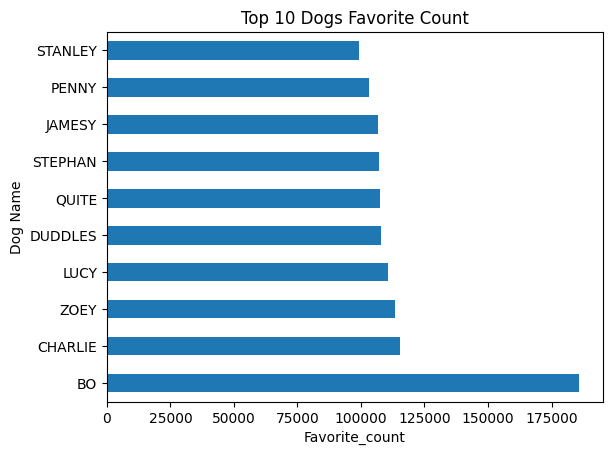

In [105]:
top_fav_dogs.plot.barh()

plt.xlabel("Favorite_count")
plt.ylabel("Dog Name")
plt.title("Top 10 Dogs Favorite Count")
plt.show()

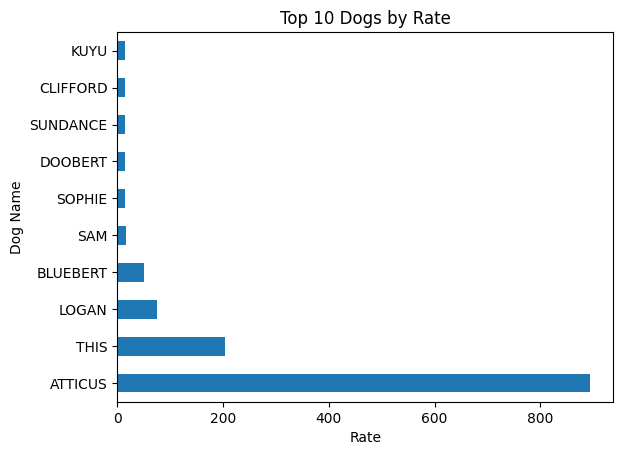

In [106]:
top_rate_dogs.plot.barh()

plt.xlabel("Rate")
plt.ylabel("Dog Name")
plt.title("Top 10 Dogs by Rate")
plt.show()

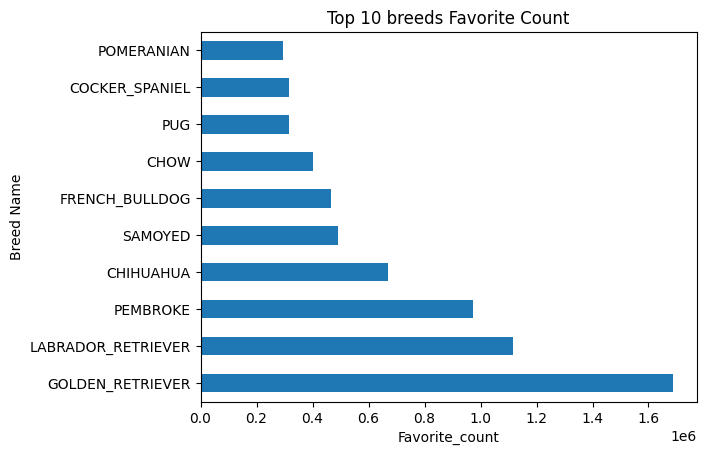

In [107]:
top_fav_breed.plot.barh()

plt.xlabel("Favorite_count")
plt.ylabel("Breed Name")
plt.title("Top 10 breeds Favorite Count")
plt.show()